In [ ]:
!pip install kneed

In [ ]:
import os
from google.colab import drive
import pathlib
from pathlib import Path

drive.mount('/content/gdrive',force_remount=True)

Working_Directory = 'My Drive/Colab Notebooks/NVIDIA_AICITY' #@param {type:"string"}
wd=Path("/content/gdrive/"+Working_Directory)
os.chdir(wd)

dirpath = Path.cwd()
print("current directory is : " + str(dirpath))

from collections import Counter, defaultdict
from kneed import KneeLocator
from sklearn.cluster import KMeans
from matplotlib.patches import Rectangle
from vid_utils import *

import numpy as np 
import cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import json
from os import path

Mounted at /content/gdrive
current directory is : /content/gdrive/My Drive/Colab Notebooks/NVIDIA_AICITY


In [ ]:
with open('result.json', 'r') as f:
    D = json.load(f)

 ## Extract Objects

In [ ]:
All_Cords = extract_objects(D)

## Extract Cases

In [ ]:
AT = extract_cases(All_Cords)

## Detect Change in Camera

In [ ]:
Base = "processed_images/"
if path.exists("change.npy"):
    change_cam,loc,Cstat = np.load("change.npy", allow_pickle=True)
else:
    change_cam, loc,Cstat = change_detect(Base)
    np.save("change.npy",[change_cam,loc,Cstat])

In [ ]:
PT = list(set(AT) - set(change_cam))

## Case 1: Extract ROI

In [ ]:

if path.exists("centers1.npy"):
    Centers = np.load("centers1.npy",allow_pickle=True)
else:
    Centers = extract_roi(PT,All_Cords)
    np.save("centers1.npy",Centers)

In [ ]:
len(Centers)

56

## Case 1: Extract Bounds

In [ ]:


if path.exists("bounds1.npy"):
    Bounds = np.load("bounds1.npy",allow_pickle=True)
else:
    Bounds = extract_bounds(Centers,PT,All_Cords)
    np.save("bounds1.npy",Bounds)

In [ ]:
len(Bounds)

95

## Case 1: Backtracking

/content/gdrive/My Drive/Colab Notebooks/NVIDIA_AICITY/vid_utils.py:513: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim = measure.compare_ssim(img0,img1,multichannel=True,win_size=3)


video name: 1
frame_image: 8400.jpg


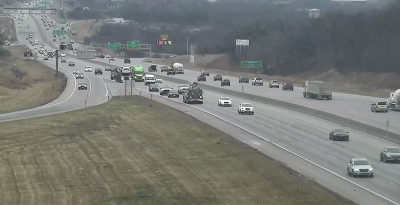

video name: 1
frame_image: 22990.jpg


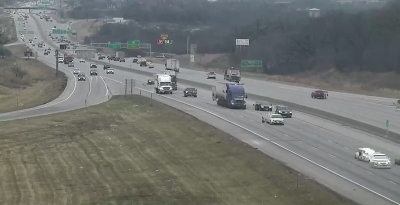

video name: 1
frame_image: 4970.jpg


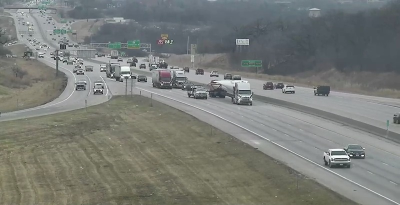

video name: 6
frame_image: 6760.jpg


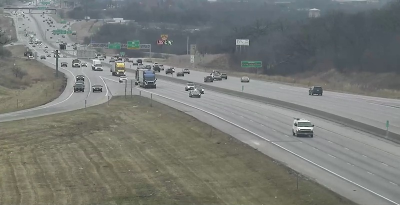

video name: 6
frame_image: 6750.jpg


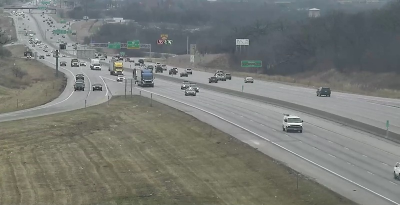

video name: 12
frame_image: 11140.jpg


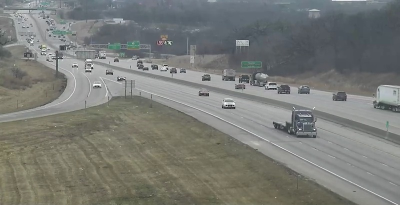

video name: 15
frame_image: 26130.jpg


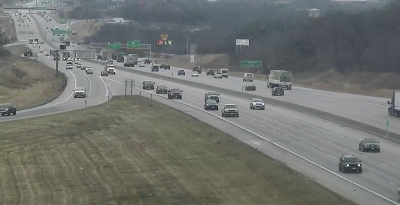

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
%rm -r "result1.npy"
Base = "ori_images/"

if path.exists("result1.npy"):
    Times, Stat = np.load("result1.npy",allow_pickle=True)
else:
    Times, Stat = backtrack(Bounds,PT,Base)
    np.save("result1.npy",[Times,Stat])

## Case 2: Extract ROI 

In [ ]:
if path.exists("centers2.npy"):
    Centers2 = np.load("centers2.npy",allow_pickle=True)
else:
    Centers2 = extract_roi1(change_cam,All_Cords,loc)
    np.save("centers2.npy",Centers2)

## Case 2: Extract Bounds

In [ ]:
if path.exists("bounds2.npy"):
    Bounds2 = np.load("bounds2.npy",allow_pickle=True)
else:
    Bounds2 = extract_bounds1(Centers2,change_cam,loc,All_Cords)
    np.save("bounds2.npy",Bounds2)


## Case 2: Backtracking

In [ ]:
len(Centers),len(Centers2)

NameError: ignored

In [ ]:
len(Bounds),len(Bounds2)

(95, 18)

In [ ]:
Base = "ori_images/"


if path.exists("result2.npy"):
    Times2, Stat2 = np.load("result2.npy", allow_pickle=True)
else:
    Times2, Stat2 = backtrack1(Bounds2,Base)
    np.save("result2.npy",[Times2,Stat2])

In [ ]:
Times = {key:val for key, val in Times.items() if val != 999}
Times = {key:val for key, val in Times.items() if val >= 40}

Times2 = {key:val for key, val in Times2.items() if val != 999}
Times2 = {key:val for key, val in Times2.items() if val >= 40}

In [ ]:
file1 = open("Result" + ".txt","w")
for x in Times:
    file1.write('{0:2d} {1:3d} {2:1d}'.format(x,int(Times[x]),1))
    file1.write("\n")
    
for x in Times2:
    file1.write('{0:2d} {1:3d} {2:1d}'.format(x,int(Times2[x]),1))
    file1.write("\n")
    
file1.close()